Cluster 0: 29 points
Cluster 1: 28 points
Cluster 2: 62 points
Cluster 3: 36 points
Cluster 4: 33 points
Cluster 5: 36 points
Cluster 6: 32 points
Cluster 7: 29 points
Cluster 8: 40 points
Cluster 9: 23 points
Cluster 10: 33 points
Cluster 11: 12 points
Cluster 12: 22 points
Cluster 13: 27 points
Cluster 14: 23 points
Cluster 15: 18 points
Cluster 16: 16 points
Cluster 17: 28 points
Cluster 18: 19 points
Cluster 19: 13 points
Silhouette Score: 0.5577072312500706
Davies-Bouldin Index: 0.758516682966097


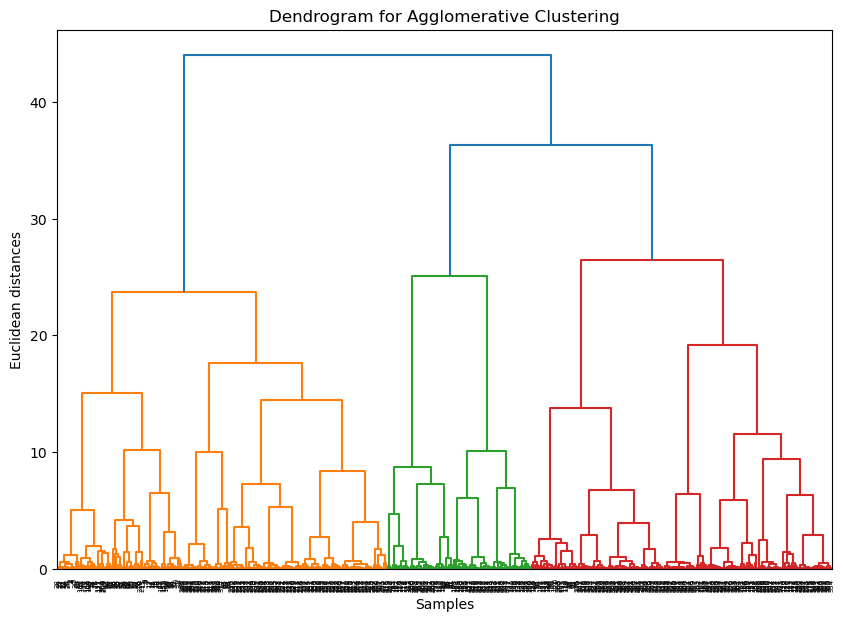

C:\Users\User\AppData\Local\Temp\ipykernel_5328\3201690659.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', n_clusters)


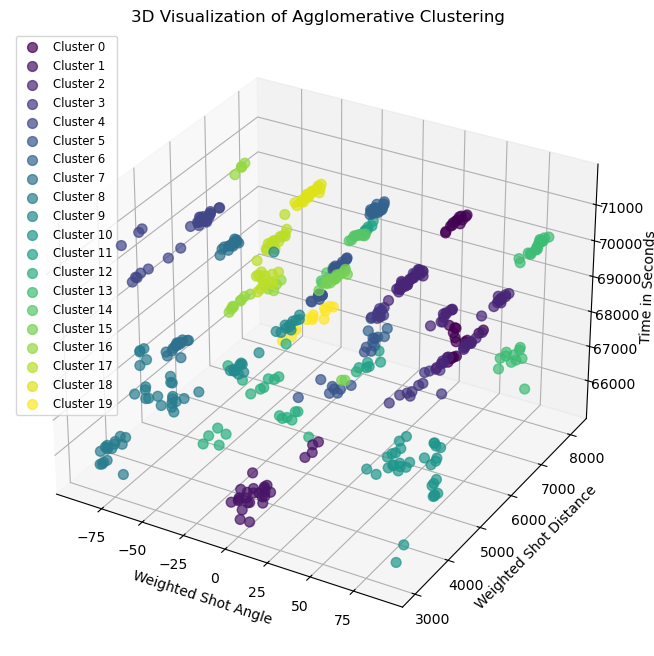

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

# קריאת הדאטה הנקי
df = pd.read_csv('clean_df.csv')  # הכנס את הנתיב הנכון לקובץ שלך

# שקלול המיקום לעומת הזמן
df['Weighted_Angle'] = df['ShotAngle'] * 1
df['Weighted_Distance'] = df['ShotDistance'] * 1
df['Weighted_Time'] = df['TimeInSeconds'] * 1

# יצירת דאטה משוקלל לקלאסטרינג
weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time','OriginX','OriginY', 'Position', '3P-Range']]

# נירמול הנתונים
scaler = StandardScaler()
weighted_data_scaled = scaler.fit_transform(weighted_data)

# ניסוי ראשוני לקלאסטרים
n_clusters = 20 

# ביצוע קלאסטרינג עם Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agglo.fit_predict(weighted_data_scaled)

# הוספת התוויות לדאטה פריים
df['Cluster'] = labels

# הדפסת מספר הנקודות בכל קלאסטר
unique_clusters, counts = np.unique(labels, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} points")

# חישוב מדדי הערכה
silhouette = silhouette_score(weighted_data_scaled, labels)
davies_bouldin = davies_bouldin_score(weighted_data_scaled, labels)
print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

# ציור דנדרוגרמה לראות את המבנה ההיררכי
linked = linkage(weighted_data_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# ויזואליזציה תלת מימדית של הקלאסטרים
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# הגדרת צבעים לכל קלאסטר
colors = plt.cm.get_cmap('viridis', n_clusters)

for cluster in unique_clusters:
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Weighted_Angle'], cluster_data['Weighted_Distance'], cluster_data['Weighted_Time'], 
               c=np.array([colors(cluster)]), label=f'Cluster {cluster}', s=50, alpha=0.7)

# הגדרות גרף
ax.set_title('3D Visualization of Agglomerative Clustering')
ax.set_xlabel('Weighted Shot Angle')
ax.set_ylabel('Weighted Shot Distance')
ax.set_zlabel('Time in Seconds')
plt.legend(loc='best', fontsize='small')
plt.grid(True)

# הצגת הגרף
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_5328\314971892.py:51: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(unique_clusters))


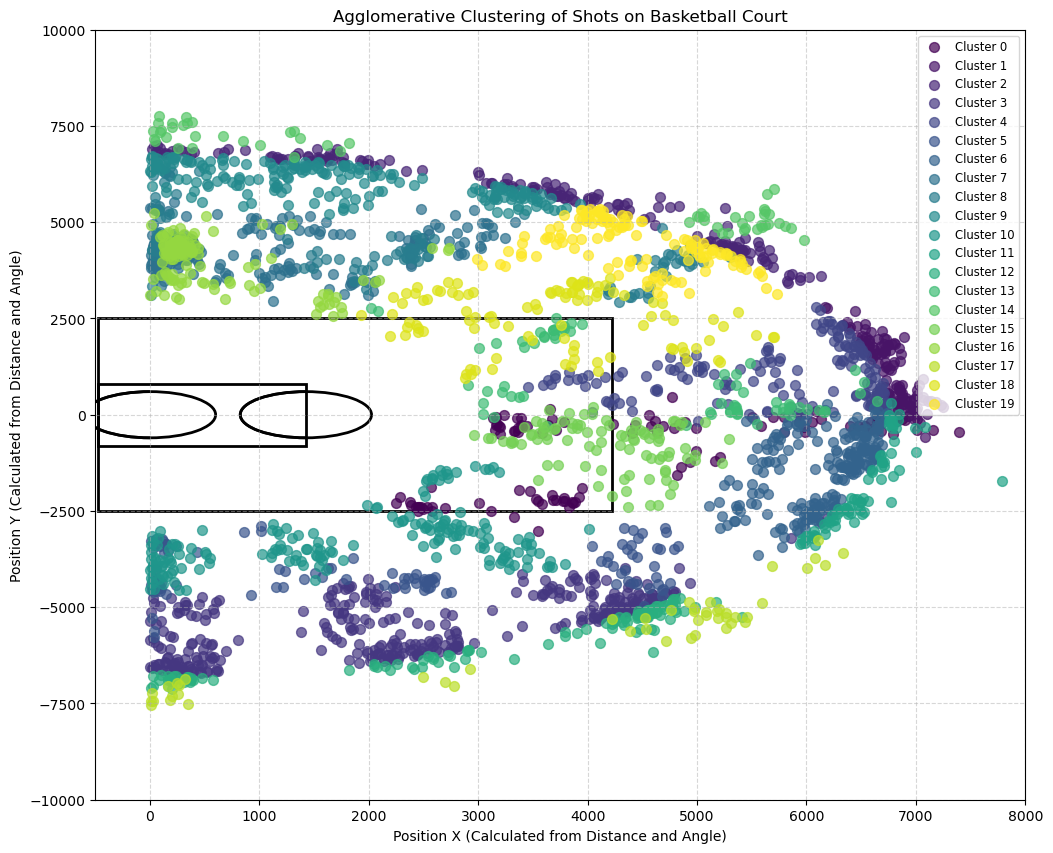

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage


# הגדרת מספר הקלאסטרים
n_clusters = 20  # ניתן לשנות את המספר בהתאם לתוצאות הדנדרוגרמה

# ביצוע קלאסטרינג עם Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agglo.fit_predict(weighted_data_scaled)

# הוספת התוויות לדאטה פריים
df['Cluster'] = labels

# ציור מגרש הכדורסל
def draw_basketball_court(ax=None, color='black', lw=2, scale=10):
    if ax is None:
        ax = plt.gca()
    
    court_elements = [
        patches.Rectangle((-47.5 * scale, -250 * scale), 470 * scale, 500 * scale, linewidth=lw, color=color, fill=False),  # חצי מגרש
        patches.Circle((0, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # הכדור המרכזי
        patches.Arc((0, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color, fill=False),  # חצי מעגל המרכז
        patches.Rectangle((-47.5 * scale, -80 * scale), 190 * scale, 160 * scale, linewidth=lw, color=color, fill=False),  # אזור העונשין
        patches.Circle((142.5 * scale, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # עיגול העונשין
        patches.Arc((142.5 * scale, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color, fill=False),  # חצי מעגל העונשין
    ]
    
    for element in court_elements:
        ax.add_patch(element)

# המרה של מרחק וזווית למיקומי X ו-Y על המגרש
df['PlotX'] = df['ShotDistance'] * np.cos(np.radians(df['ShotAngle']))
df['PlotY'] = df['ShotDistance'] * np.sin(np.radians(df['ShotAngle']))

# יצירת גרף פיזור למיקום הזריקות על מגרש הכדורסל לפי המרחק והזווית
plt.figure(figsize=(12, 10))
ax = plt.gca()

# ציור המגרש עם סיבוב של 90 מעלות והתאמת גודל לסקאלה
draw_basketball_court(ax, scale=10)

# הגדרת צבעים לקלסטרים
unique_clusters = sorted(df['Cluster'].unique())  # מיון הערכים הייחודיים של הקלאסטרים
colors = plt.cm.get_cmap('viridis', len(unique_clusters))

# ציור הזריקות לפי קלאסטרים (מיקום לפי מרחק וזווית)
for idx, cluster in enumerate(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    if cluster == -1:
        # רעש בצבע אפור
        ax.scatter(cluster_data['PlotX'], cluster_data['PlotY'], c='grey', label='Noise', s=50, alpha=0.5)
    else:
        # קלאסטרים בצבעים שונים
        scatter = ax.scatter(
            cluster_data['PlotX'], cluster_data['PlotY'], 
            c=np.array([colors(idx)]),  # שימוש באינדקס של הקלאסטר כדי לצבוע את הנקודות
            s=50, alpha=0.7, 
            label=f'Cluster {cluster}'
        )

# הגדרות גרף מותאמות לסקאלה החדשה
ax.set_xlim(-500, 8000)
ax.set_ylim(-10000, 10000)
ax.set_title('Agglomerative Clustering of Shots on Basketball Court')
ax.set_xlabel('Position X (Calculated from Distance and Angle)')
ax.set_ylabel('Position Y (Calculated from Distance and Angle)')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True, linestyle='--', alpha=0.5)

# הצגת הגרף
plt.show()

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

# קריאת הדאטה הנקי


# הגדרת מספר הקלאסטרים
n_clusters = 20  # ניתן לשנות את המספר בהתאם לתוצאות הדנדרוגרמה

# ביצוע קלאסטרינג עם Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agglo.fit_predict(weighted_data_scaled)

# הוספת התוויות לדאטה פריים
df['Cluster'] = labels

# ציור מגרש הכדורסל
def draw_basketball_court(ax=None, color='black', lw=2, scale=10):
    if ax is None:
        ax = plt.gca()
    
    court_elements = [
        patches.Rectangle((-47.5 * scale, -250 * scale), 470 * scale, 500 * scale, linewidth=lw, color=color, fill=False),  # חצי מגרש
        patches.Circle((0, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # הכדור המרכזי
        patches.Arc((0, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color, fill=False),  # חצי מעגל המרכז
        patches.Rectangle((-47.5 * scale, -80 * scale), 190 * scale, 160 * scale, linewidth=lw, color=color, fill=False),  # אזור העונשין
        patches.Circle((142.5 * scale, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # עיגול העונשין
        patches.Arc((142.5 * scale, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color, fill=False),  # חצי מעגל העונשין
    ]
    
    for element in court_elements:
        ax.add_patch(element)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 a

Silhouette Score: 0.5577072312500706
Davies-Bouldin Index: 0.758516682966097


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 a

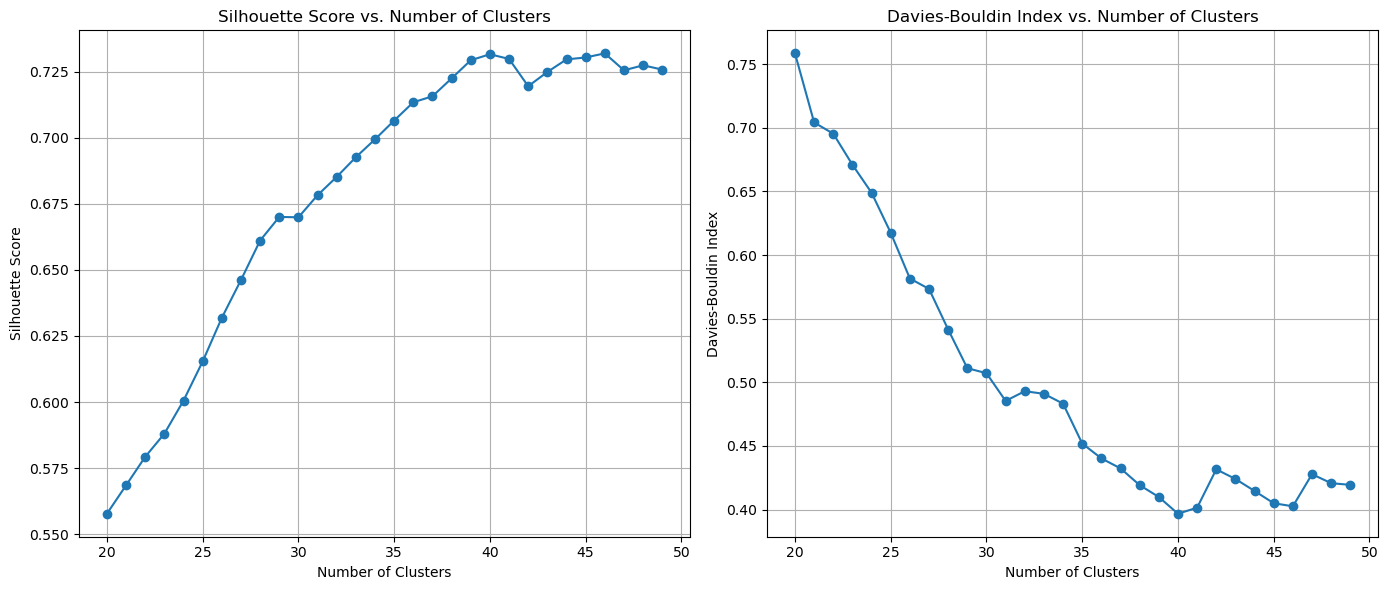

In [3]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# שימוש ב-Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')
labels = agg_cluster.fit_predict(weighted_data_scaled)

# הוספת התוויות לדאטה פריים
df['Cluster_Agglomerative'] = labels

# חישוב מדדי ביצועים
silhouette = silhouette_score(weighted_data_scaled, labels)
davies_bouldin = davies_bouldin_score(weighted_data_scaled, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

# שיפור בעזרת חיפוש מספר קלאסטרים אופטימלי
silhouette_scores = []
davies_bouldin_scores = []
n_clusters_range = range(20, 50)

for n_clusters in n_clusters_range:
    agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    labels = agg_cluster.fit_predict(weighted_data_scaled)
    silhouette = silhouette_score(weighted_data_scaled, labels)
    davies_bouldin = davies_bouldin_score(weighted_data_scaled, labels)
    silhouette_scores.append(silhouette)
    davies_bouldin_scores.append(davies_bouldin)

# ויזואליזציה של תוצאות החיפוש
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(n_clusters_range, davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)

plt.tight_layout()
plt.show()


Cluster 0: 137 points
Cluster 1: 192 points
Cluster 2: 77 points
Cluster 3: 94 points
Cluster 4: 131 points
Cluster 5: 73 points
Cluster 6: 80 points
Cluster 7: 66 points
Cluster 8: 144 points
Cluster 9: 51 points
Cluster 10: 98 points
Cluster 11: 76 points
Cluster 12: 43 points
Cluster 13: 93 points
Cluster 14: 363 points
Cluster 15: 56 points
Cluster 16: 78 points
Cluster 17: 146 points
Cluster 18: 33 points
Cluster 19: 73 points
Cluster 20: 32 points
Cluster 21: 32 points
Cluster 22: 118 points
Cluster 23: 24 points
Cluster 24: 35 points
Cluster 25: 79 points
Cluster 26: 35 points
Cluster 27: 75 points
Cluster 28: 27 points
Cluster 29: 90 points
Cluster 30: 76 points
Cluster 31: 36 points
Cluster 32: 12 points
Cluster 33: 29 points
Cluster 34: 60 points
Cluster 35: 16 points
Cluster 36: 51 points
Cluster 37: 36 points
Cluster 38: 28 points
Cluster 39: 23 points


C:\Users\User\AppData\Local\Temp\ipykernel_5328\4286562041.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('hsv', len(unique_clusters))  # שימוש במפת צבעים עשירה יותר


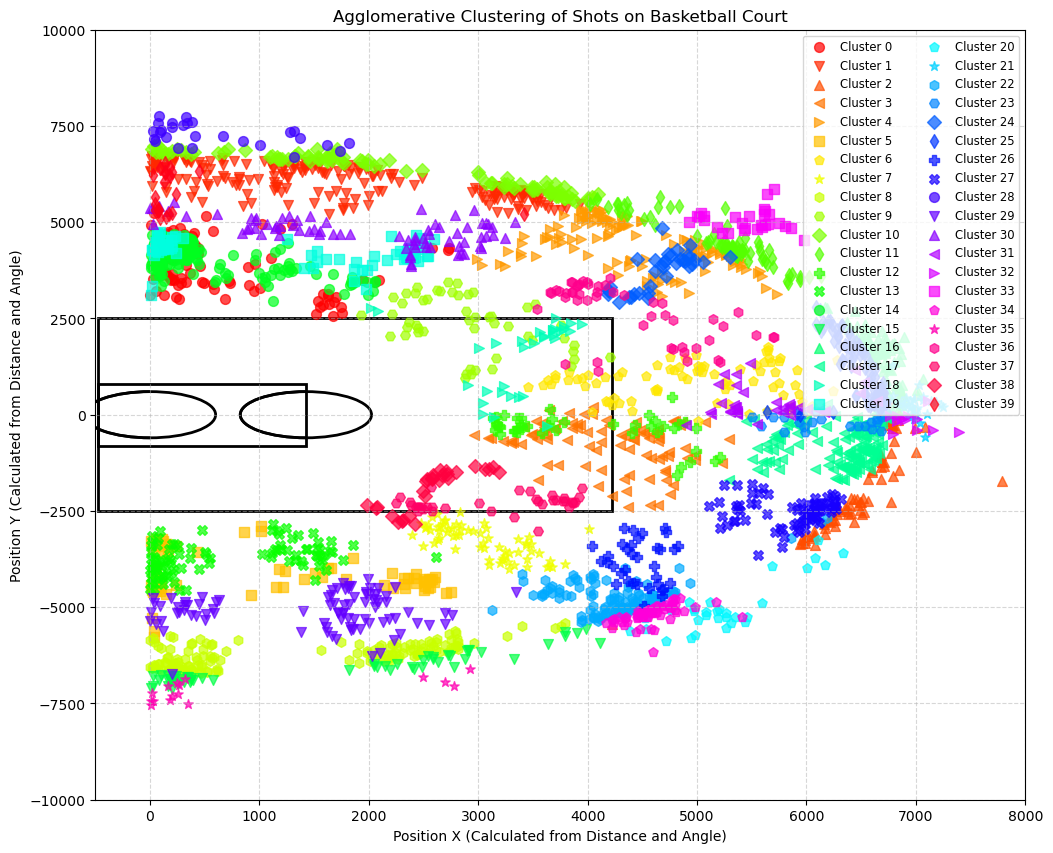

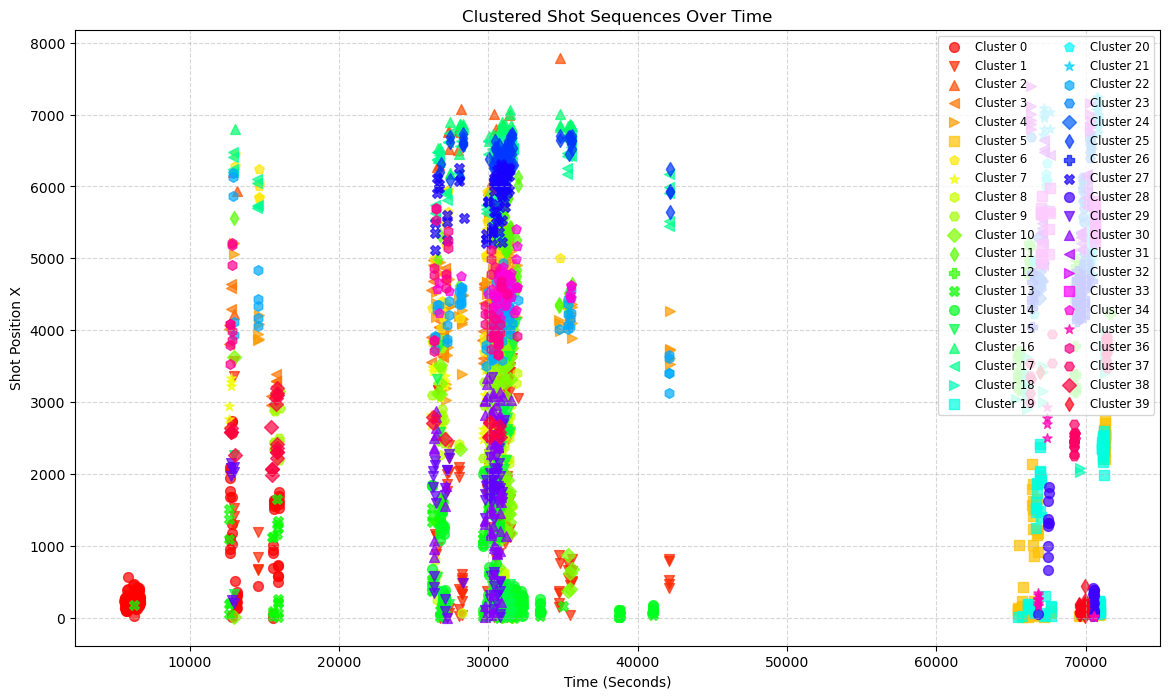

Silhouette Score: 0.5218830024751929
Davies-Bouldin Index: 0.6696759238453226


In [8]:

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage

# שקלול המיקום לעומת הזמן
df['Weighted_Angle'] = df['ShotAngle'] * 1
df['Weighted_Distance'] = df['ShotDistance'] * 1
df['Weighted_Time'] = df['TimeInSeconds'] * 1

# יצירת דאטה משוקלל לקלאסטרינג
weighted_data = df[['Weighted_Angle', 'Weighted_Distance', 'Weighted_Time','OriginX','OriginY', 'Position', '3P-Range']]

# נירמול הנתונים
scaler = StandardScaler()
weighted_data_scaled = scaler.fit_transform(weighted_data)

# הגדרת מספר הקלאסטרים
n_clusters = 40  # ניתן לשנות את המספר בהתאם לתוצאות הדנדרוגרמה

# ביצוע קלאסטרינג עם Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
labels = agglo.fit_predict(weighted_data_scaled)

# הוספת התוויות לדאטה פריים
df['Cluster'] = labels

# הדפסת מספר הנקודות בכל קלאסטר כולל רעש
unique_clusters, counts = np.unique(labels, return_counts=True)
for cluster, count in zip(unique_clusters, counts):
    print(f"Cluster {cluster}: {count} points")

# ציור מגרש הכדורסל
def draw_basketball_court(ax=None, color='black', lw=2, scale=10):
    if ax is None:
        ax = plt.gca()
    
    court_elements = [
        patches.Rectangle((-47.5 * scale, -250 * scale), 470 * scale, 500 * scale, linewidth=lw, color=color, fill=False),  # חצי מגרש
        patches.Circle((0, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # הכדור המרכזי
        patches.Arc((0, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color, fill=False),  # חצי מעגל המרכז
        patches.Rectangle((-47.5 * scale, -80 * scale), 190 * scale, 160 * scale, linewidth=lw, color=color, fill=False),  # אזור העונשין
        patches.Circle((142.5 * scale, 0), 60 * scale, linewidth=lw, color=color, fill=False),  # עיגול העונשין
        patches.Arc((142.5 * scale, 0), 120 * scale, 120 * scale, theta1=90, theta2=270, linewidth=lw, color=color, fill=False),  # חצי מעגל העונשין
    ]
    
    for element in court_elements:
        ax.add_patch(element)

# המרה של מרחק וזווית למיקומי X ו-Y על המגרש
df['PlotX'] = df['ShotDistance'] * np.cos(np.radians(df['ShotAngle']))
df['PlotY'] = df['ShotDistance'] * np.sin(np.radians(df['ShotAngle']))

# יצירת גרף פיזור למיקום הזריקות על מגרש הכדורסל לפי המרחק והזווית
plt.figure(figsize=(12, 10))
ax = plt.gca()

# ציור המגרש עם סיבוב של 90 מעלות והתאמת גודל לסקאלה
draw_basketball_court(ax, scale=10)

# הגדרת צבעים וסימנים לקלאסטרים
unique_clusters = sorted(df['Cluster'].unique())  # מיון הערכים הייחודיים של הקלאסטרים
colors = plt.cm.get_cmap('hsv', len(unique_clusters))  # שימוש במפת צבעים עשירה יותר
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']  # מגוון סימנים

# ציור הזריקות לפי קלאסטרים (מיקום לפי מרחק וזווית)
for idx, cluster in enumerate(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    marker = markers[idx % len(markers)]  # בחירת סימן מתוך הרשימה, תוך שימוש במודולו כדי למחזר סימנים
    color = colors(idx)  # בחירת צבע מתוך מפת הצבעים
    
    if cluster == -1:
        # רעש בצבע אפור
        ax.scatter(cluster_data['PlotX'], cluster_data['PlotY'], c='grey', label='Noise', s=50, alpha=0.5, marker='x')
    else:
        # קלאסטרים בצבעים וסימנים שונים
        ax.scatter(
            cluster_data['PlotX'], cluster_data['PlotY'], 
            c=[color], label=f'Cluster {cluster}', s=50, alpha=0.7, marker=marker
        )

# הגדרות גרף מותאמות לסקאלה החדשה
ax.set_xlim(-500, 8000)
ax.set_ylim(-10000, 10000)
ax.set_title('Agglomerative Clustering of Shots on Basketball Court')
ax.set_xlabel('Position X (Calculated from Distance and Angle)')
ax.set_ylabel('Position Y (Calculated from Distance and Angle)')
plt.legend(loc='upper right', fontsize='small', ncol=2)  # הצגת אגדה עם מספר עמודות
plt.grid(True, linestyle='--', alpha=0.5)

# הצגת הגרף
plt.show()

# Plotting Clusters Over Time Using the Same Symbols
plt.figure(figsize=(14, 8))
for idx, cluster in enumerate(unique_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    marker = markers[idx % len(markers)]
    color = colors(idx)
    
    plt.scatter(
        cluster_data['TimeInSeconds'], cluster_data['PlotX'], 
        c=[color], label=f'Cluster {cluster}', s=50, alpha=0.7, marker=marker
    )

plt.title('Clustered Shot Sequences Over Time')
plt.xlabel('Time (Seconds)')
plt.ylabel('Shot Position X')
plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()



silhouette = silhouette_score(weighted_data_scaled, labels)
davies_bouldin = davies_bouldin_score(weighted_data_scaled, labels)

print(f"Silhouette Score: {silhouette}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

